In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import os
import cv2


This function  is only for copy face images to new folder

In [ ]:
def copy_face_new_folder(source_path,destination_path)
'''first create parallel folders for all classes in train set in destination path'''
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/mask/haarcascade_frontalface_default.xml')
test_img_folder = os.listdir(source_path)
#test_face_img_folder = os.listdir('/content/drive/MyDrive/face_project/train_face')
for folder in test_img_folder:
  test_img_names = os.listdir(source_path+'/'+folder)
  img_count=0
  for test_img_name in test_img_names:
    color_img = cv2.imread(source_path+'/'+folder+'/'+test_img_name)
    grey_img = cv2.cvtColor(color_img,cv2.COLOR_BGR2GRAY)
    faces =  face_cascade.detectMultiScale(grey_img,1.1,10)
    img_count += 10
    for (x,y,w,h) in faces:
      img_count+=1
      face_img = color_img[y:y+h,x:x+w]
      cv2.imwrite(destination_path+'/'+folder+'/'+'%dimg.jpg'%(img_count),face_img)

# New Section

In [ ]:
test_path = '/content/drive/MyDrive/face_project/test_face'
train_path = '/content/drive/MyDrive/face_project/train_face'

In [ ]:
data_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data = data_gen.flow_from_directory(train_path,target_size=(227,227),batch_size=32,class_mode='sparse')

Found 465 images belonging to 4 classes.


In [ ]:
train_data.class_indices

{'ajith': 0, 'kamal': 1, 'rajini': 2, 'vijay': 3}

In [ ]:
test_data_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_data = test_data_gen.flow_from_directory(test_path,target_size=(227,227),batch_size=32,class_mode='sparse')

Found 134 images belonging to 4 classes.


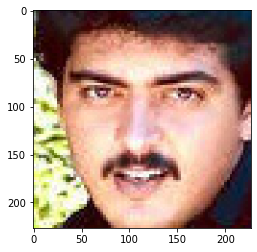

In [ ]:
plt.imshow(train_data[0][0][0])

In [ ]:
def plot_img(img_arr):
  img,axes = plt.subplots(1,5,figsize=(20,20))
  axes.flatten()
  for imges,ax in zip(img_arr,axes):
    ax.imshow(imges)
    plt.tight_layout()
    #plt.show()

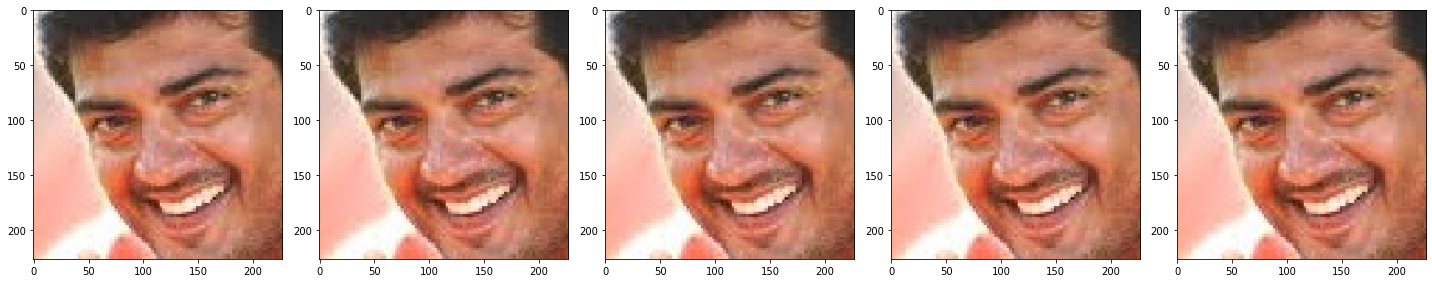

In [ ]:
im_arr=[train_data[0][0][1] for i in range(5)]
plot_img(im_arr)

In [ ]:
face_model= keras.models.Sequential([
                                  keras.layers.Conv2D(filters=32,kernel_size=5,input_shape=(227,227,3)),
                                  keras.layers.MaxPooling2D(pool_size=(4,4)),
                                  keras.layers.Conv2D(filters=64,kernel_size=4),
                                  keras.layers.MaxPooling2D(pool_size=(3,3)),
                                  keras.layers.Conv2D(filters=128,kernel_size=3),
                                  keras.layers.MaxPooling2D(pool_size=(2,2)),                    
                                  keras.layers.Conv2D(filters=256,kernel_size=2),
                                  keras.layers.MaxPooling2D(pool_size=(2,2)), 
                                  keras.layers.Dropout(0.5),
                                  keras.layers.Flatten(),
                                  keras.layers.Dense(units=128,activation='relu'),
                                  keras.layers.Dropout(0.1),
                                  keras.layers.Dense(units=256,activation='relu'),
                                  keras.layers.Dropout(0.2),
                                  keras.layers.Dense(units=4,activation='softmax')])

In [ ]:
face_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         1

In [ ]:
face_model.compile(optimizer=Adam(lr=0.0001),loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [ ]:
model_path = '/content/drive/MyDrive/face_project/face_fun_model.h5'
checkpoints = ModelCheckpoint(model_path,monitor='val_accuracy',save_best_only=True,verbose=1)
callback_list = [checkpoints]

In [ ]:
history = face_model.fit(train_data,epochs=50,batch_size=32,verbose=1,callbacks=callback_list,validation_data=test_data)

Epoch 1/50


InvalidArgumentError: ignored

In [ ]:
face_model_simple= keras.models.Sequential([
                                  keras.layers.Conv2D(filters=16,kernel_size=(3,3),input_shape=(227,227,3)),
                                  keras.layers.MaxPooling2D(pool_size=(2,2)),
                                  keras.layers.Conv2D(filters=32,kernel_size=(3,3)),
                                  keras.layers.MaxPooling2D(pool_size=(2,2)),
                                  keras.layers.Conv2D(filters=64,kernel_size=(3,3)),
                                  keras.layers.MaxPooling2D(pool_size=(2,2)),
                                  keras.layers.Dropout(0.2),
                                  keras.layers.Flatten(),
                                  keras.layers.Dropout(0.2),
                                  
                                  keras.layers.Dense(units=512,activation='relu'),
                                  keras.layers.Dropout(0.2),
                                  keras.layers.Dense(units=4,activation='softmax')])

In [ ]:
face_model_simple.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 225, 225, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 53, 53, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 64)        0

In [ ]:
face_model_simple.compile(optimizer=Adam(0.001),loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [ ]:
simple_model_path = '/content/drive/MyDrive/face_project/simple_face_fun_model.h5'
checkpoint=ModelCheckpoint(simple_model_path,monitor='val_accuracy',save_best_only=True,verbose=1)
callback_list_simple = [checkpoint]

history = face_model_simple.fit(train_data,epochs=50,verbose=1,validation_data=test_data,callbacks=callback_list_simple)

In [ ]:
history = face_model_simple.fit(train_data,epochs=50,verbose=1,validation_data=test_data,callbacks=callback_list_simple)

Epoch 1/50
15/15 [==============================] - ETA: 0s - loss: 5.3629 - accuracy: 0.2796 
Epoch 00001: val_accuracy improved from -inf to 0.47761, saving model to /content/drive/MyDrive/face_project/simple_face_fun_model.h5
15/15 [==============================] - 482s 32s/step - loss: 5.3629 - accuracy: 0.2796 - val_loss: 1.3934 - val_accuracy: 0.4776
Epoch 2/50
15/15 [==============================] - ETA: 0s - loss: 1.2684 - accuracy: 0.4968
Epoch 00002: val_accuracy did not improve from 0.47761
15/15 [==============================] - 20s 1s/step - loss: 1.2684 - accuracy: 0.4968 - val_loss: 1.2018 - val_accuracy: 0.4627
Epoch 3/50
15/15 [==============================] - ETA: 0s - loss: 0.8859 - accuracy: 0.6495
Epoch 00003: val_accuracy improved from 0.47761 to 0.70149, saving model to /content/drive/MyDrive/face_project/simple_face_fun_model.h5
15/15 [==============================] - 22s 1s/step - loss: 0.8859 - accuracy: 0.6495 - val_loss: 0.8913 - val_accuracy: 0.7015
Ep

# alexnet model

In [ ]:
alex_model =keras.models.Sequential([
                                    keras.layers.Conv2D(filters=96,kernel_size=(11,11),strides=4,input_shape=(227,227,3)),
                                    keras.layers.MaxPooling2D(pool_size=(3,3),strides=2),
                                    keras.layers.Conv2D(filters=256,kernel_size=(5,5),padding='same'),
                                    keras.layers.MaxPooling2D(pool_size=(3,3),strides=2),
                                    keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding='same'),
                                    
                                    keras.layers.Conv2D(filters=384,kernel_size=(3,3),padding='same'),
                                    keras.layers.Conv2D(filters=384,kernel_size=(3,3),padding='same'),
                                    keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding='same',strides=2),
                                    keras.layers.MaxPooling2D(pool_size=(3,3)),
                                    keras.layers.Flatten(),
                                    keras.layers.Dense(units=9216,activation='relu'),
                                    keras.layers.Dense(units=4096,activation='relu'),
                                    keras.layers.Dense(units=4096,activation='relu'),
                                    keras.layers.Dense(units=4,activation='softmax')

            ])

In [ ]:
alex_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 256)       590080    
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 384)      

In [ ]:
alex_model.compile(optimizer=Adam(0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
alex_model_path = '/content/drive/MyDrive/face_project/alex_face_fun_model.h5'
checkpoints_alex = ModelCheckpoint(alex_model_path,monitor='val_accuracy',save_best_only=True)
callbacks_alex = [checkpoints_alex]

In [ ]:
alex_model.fit(train_data,epochs=50,callbacks=callbacks_alex,validation_data=test_data,verbose=1)

Epoch 1/50
15/15 [==============================] - 92s 6s/step - loss: 1.3615 - accuracy: 0.3333 - val_loss: 1.3816 - val_accuracy: 0.3731
Epoch 2/50
15/15 [==============================] - 78s 5s/step - loss: 1.3032 - accuracy: 0.4409 - val_loss: 1.3700 - val_accuracy: 0.4030
Epoch 3/50
15/15 [==============================] - 75s 5s/step - loss: 1.0815 - accuracy: 0.5462 - val_loss: 1.0293 - val_accuracy: 0.5448
Epoch 4/50
15/15 [==============================] - 76s 5s/step - loss: 0.8295 - accuracy: 0.6624 - val_loss: 0.8944 - val_accuracy: 0.6791
Epoch 5/50
15/15 [==============================] - 70s 5s/step - loss: 0.6761 - accuracy: 0.7355 - val_loss: 0.9428 - val_accuracy: 0.6791
Epoch 6/50
15/15 [==============================] - 74s 5s/step - loss: 0.4840 - accuracy: 0.8043 - val_loss: 0.7140 - val_accuracy: 0.7761
Epoch 7/50
15/15 [==============================] - 76s 5s/step - loss: 0.3286 - accuracy: 0.8817 - val_loss: 0.8519 - val_accuracy: 0.7910
Epoch 8/50
15/15 [==

KeyboardInterrupt: ignored